In [8]:
import joblib

import pandas as pd
import numpy as np
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline

### tuility function

In [9]:
from utils import clean_text

ImportError: cannot import name 'clean_text' from 'utils' (/home/cisco/Downloads/sentiment_analysis/utils.py)

#### load Data

In [63]:
movie = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=["reviews", "rating"])
movie.head(4)

,reviews,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0


#### Create Label(Positive and Negative)

In [64]:
movie['labels'] = movie["rating"].apply(lambda x: "Positive" if x else "Negative")
movie.head(4)

,reviews,rating,labels
0,"A very, very, very slow-moving, aimless movie ...",0,Negative
1,Not sure who was more lost - the flat characte...,0,Negative
2,Attempting artiness with black & white and cle...,0,Negative
3,Very little music or anything to speak of.,0,Negative


#### Missing values

In [65]:
movie.isna().sum()

reviews    0
rating     0
labels     0
dtype: int64

#### label length of words in document

In [66]:
movie['length'] = movie['reviews'].apply(lambda x: len(str(x).split(' ')))
movie.head(4)

,reviews,rating,labels,length
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15
1,Not sure who was more lost - the flat characte...,0,Negative,21
2,Attempting artiness with black & white and cle...,0,Negative,33
3,Very little music or anything to speak of.,0,Negative,10


#### Array of length of word in document

In [67]:
movie['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800])

#### Distribution of word in document

<BarContainer object of 55 artists>

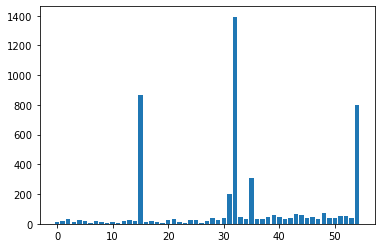

In [68]:
unique_lengths = movie['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

### Total values of positive and negative values  

In [69]:
print(movie['labels'].value_counts())

Positive    386
Negative    362
Name: labels, dtype: int64


### Clean Data

In [70]:
movie['clean_review'] = movie['reviews'].apply(clean_text)
movie.head()

,reviews,rating,labels,length,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,Negative,21,not sure who wa more lost the flat character o...
2,Attempting artiness with black & white and cle...,0,Negative,33,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,0,Negative,10,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,Positive,23,the best scene in the movie wa when gerardo is...


Text Preprocessing

In [71]:
X = movie['reviews']
y = movie['rating']

Splitting, into training and testing with 60% used for training and 40% used for testing the data set, and random state set at 80 so that the result will not change each time you have to ru the model.

In [72]:
token, X_test, y_train, y_test = train_test_split(X,y, test_size = .40, random_state = 60)

In [73]:
token.shape, token.to_list()[:4]

((448,),
 ['I am so tired of clichés that is just lazy writing, and here they come in thick and fast.  ',
  'Nothing short of magnificent photography/cinematography in this film.  ',
  'The acting was bad, the dialogs were extremely shallow and insincere.  ',
  "The soundtrack wasn't terrible, either.  "])

### Training with countVectorizer and Complement NB

In [74]:
cv_NB = Pipeline([
    ('Bag_of_words', CountVectorizer(stop_words = 'english')), 
    ('classifier', ComplementNB()),
])

In [75]:
cv_NB.fit(token, y_train)

In [ ]:
joblib.dump(cv_NB, "models/complement_naive_bayes_with count_vectorizer.joblib")

In [76]:
model_predict = model.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       155
           1       0.72      0.79      0.75       145

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



#### train with Tfidf and Complement NB

In [80]:
accurancy = []
stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X,y):
   
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
    vectorizer.fit(X1_train, y1_train)
    result = vectorizer.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)

#Print the output
print('list of first 10 possible accurancy:')

for index, acc in enumerate(accuracy[:10]):
    print(f' {index+1:3d}. {acc:.4f}')


print('\nMetrics that were obtained from this model:')
print(f' Maximum Accurancy: {accuracy.max()*100:.2f}%')
print(f' Minimum Accurancy: {accuracy.min()*100:.2f}%')
print(f' Mean Accurancy: {accuracy.mean()*100:.2}%')
print(f' Std accurancy: {accuracy.std()*100:.2f}%')
print(accurancy)

print(accurancy) 

list of first 10 possible accurancy:
   1. 0.7467
   2. 0.7867
   3. 0.7067
   4. 0.7450
   5. 0.7383

Metrics that were obtained from this model:
 Maximum Accurancy: 78.67%
 Minimum Accurancy: 70.67%
 Mean Accurancy: 7.4e+01%
 Std accurancy: 2.55%
[0.7466666666666667, 0.7866666666666666, 0.7066666666666667, 0.7449664429530202, 0.738255033557047]
[0.7466666666666667, 0.7866666666666666, 0.7066666666666667, 0.7449664429530202, 0.738255033557047]


#### trainig with Tfidf with ComplementNB

In [81]:
tfidf= Pipeline([
    ('Term_freq', TfidfVectorizer()),
    ('classifier', ComplementNB()),
])

In [3]:
tfidf.fit(token, y_train)

In [ ]:
joblib.dump(tfidf_NB, "models/complement_naive_bayes_with tfidf_vectorizer.joblib")

In [82]:
accurancy = []
stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X,y):
   
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
    vectorizer.fit(X1_train, y1_train)
    result = vectorizer.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)

#Print the output
print('list of first 10 possible accurancy:')

for index, acc in enumerate(accuracy[:10]):
    print(f' {index+1:3d}. {acc:.4f}')


print('\nMetrics that were obtained from this model:')
print(f' Maximum Accurancy: {accuracy.max()*100:.2f}%')
print(f' Minimum Accurancy: {accuracy.min()*100:.2f}%')
print(f' Mean Accurancy: {accuracy.mean()*100:.2}%')
print(f' Std accurancy: {accuracy.std()*100:.2f}%')
print(accurancy)

list of first 10 possible accurancy:
   1. 0.7600
   2. 0.7733
   3. 0.7867
   4. 0.8121
   5. 0.7517

Metrics that were obtained from this model:
 Maximum Accurancy: 81.21%
 Minimum Accurancy: 75.17%
 Mean Accurancy: 7.8e+01%
 Std accurancy: 2.13%
[0.76, 0.7733333333333333, 0.7866666666666666, 0.8120805369127517, 0.7516778523489933]
[0.76, 0.7733333333333333, 0.7866666666666666, 0.8120805369127517, 0.7516778523489933]
